In [1]:
import h5py
from pathlib import Path
import torch
import matplotlib.pyplot as plt

file_path = Path("../data/essential_tremor/ET1/Pegboard_off.h5")

with h5py.File(file_path, "r") as file:
    # print(file.parent, file.file, file.name, file.id, file.attrs, sep="\n\n")
    def print_name(name):
        print(name)
    def print_name_object(name, obj):
        print(name, type(obj), obj)

    # file.visit(print_name)
    file.visititems(print_name_object)

    ex_data = torch.tensor(file["LFP"][:])
    ex_data_y = torch.tensor(file["label"][:])


temp = ex_data[0, :10000]
temp_y = ex_data_y[:100000]


output = temp_y.unfold(0, 2048, 1).to(torch.float16).mean(dim=1, keepdim=True)
print(output.shape)



LFP <class 'h5py._hl.dataset.Dataset'> <HDF5 dataset "LFP": shape (4, 1455948), type "<f8">
label <class 'h5py._hl.dataset.Dataset'> <HDF5 dataset "label": shape (1455948,), type "|b1">
torch.Size([97953, 1])


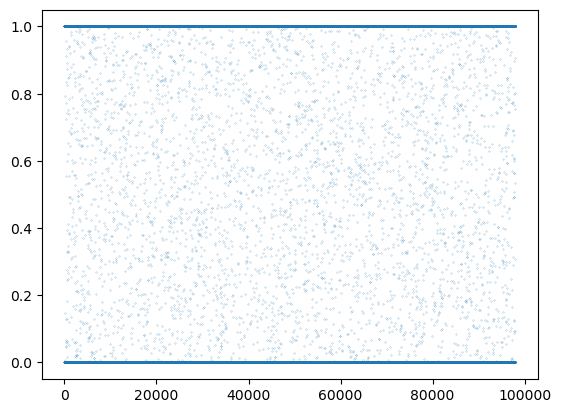

In [2]:
plt.plot(output[torch.randperm(output.shape[0])], ".", markersize=.3)

In [1]:
from movement_disorder_dl import lfp_data as data
import torch

temp = data.EssentialTremorPatientDataset(3)
(_, _, _, lfp, label) = temp["posture", "off"]
lfp.shape

####################
Patient 3 data:
  Available activities: {'posture', 'pegboard'}
  Available states: {'off', 'on'}
####################


(4, 1568945)

In [8]:
pre_fold = torch.tensor(lfp.mean(axis=0))
print(pre_fold.data_ptr())
post_fold = pre_fold.unfold(0, 2048, 1)
print(post_fold.data_ptr())

# print( torch.tensor(lfp.mean(axis=0).squeeze()).unfold(0, 2048, 1).shape )

# lalala = ( torch.where(torch.tensor(label).to(torch.double).unfold(0, 2048, 1).mean(dim=1)>.25, True, False) )

5859377152
5859377152


In [1]:
from movement_disorder_dl import lfp_data as data

dataset = data.EssentialTremorLFPDataset_Posture()
data = dataset

/Users/anthonylee/github/kaggle_kernels/movement_disorder/src/movement_disorder_dl/lfp_data/data.py:41: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert (isinstance(key, tuple) & (len(key) == 2) & isinstance(key[0], str) & isinstance(key[1], str),


####################
Patient 1 data:
  Available activities: {'posture', 'pouring', 'pegboard'}
  Available states: {'on', 'off'}
####################
####################
Patient 2 data:
  Available activities: {'posture', 'pouring', 'pegboard'}
  Available states: {'on', 'off'}
####################
####################
Patient 3 data:
  Available activities: {'posture', 'pegboard'}
  Available states: {'on', 'off'}
####################
####################
Patient 4 data:
  Available activities: {'posture', 'pouring', 'pegboard'}
  Available states: {'on', 'off'}
####################
####################
Patient 5 data:
  Available activities: {'posture', 'pouring'}
  Available states: {'on', 'off'}
####################
####################
Patient 6 data:
  Available activities: {'posture', 'pouring'}
  Available states: {'on', 'off'}
####################
####################
Patient 7 data:
  Available activities: {'posture', 'pouring', 'pegboard'}
  Available states: {'on', 'off'}

In [33]:
import torch
batch_size = 3
channel_size = 1

input = torch.randn(batch_size, channel_size, 3)
print("Step 1")
print(input)

output = torch.nn.AdaptiveAvgPool1d(1)(input)
output = torch.nn.Flatten()(output)
print("Step 2")
print(output)

linear_layer = torch.nn.Linear(1, 1)
output = linear_layer(output)

Step 1
tensor([[[ 0.3017, -0.4738, -0.5831]],

        [[-0.0029,  0.1948,  0.3480]],

        [[ 0.4942,  0.6122, -1.1974]]])
Step 2
tensor([[-0.2517],
        [ 0.1800],
        [-0.0303]])
